In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = np.load('./crop/data_pca_50_y_mean.pickle.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [5]:
X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4368, 50), (1093, 50), (4368,), (1093,))

# Train ML Model

In [8]:
from sklearn.svm import SVC

In [14]:
model = SVC(C=1.0,kernel='rbf',gamma=0.01,probability=True)

In [15]:
model.fit(x_train,y_train)
print("model trained successfully")

model trained successfully


In [16]:
model.score(x_train,y_train)

0.8601190476190477

In [17]:
model.score(x_test,y_test)

0.7795059469350412

# Model Evaluation

In [18]:
from sklearn import metrics

In [19]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)

In [30]:
len(y_test)

1093

In [29]:

def check_value(pred,test):
    count = 0
    for i in range(0,len(test),1):
        if test[i] == pred[i]:
            count+=1
    print('No of true values:{}'.format(count))
    
check_value(y_pred,y_test)

No of true values:852


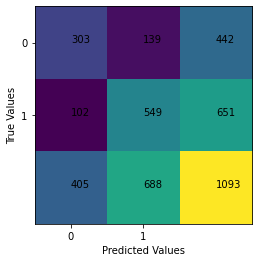

In [33]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(j,i,'%d'%cm[i,j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [34]:
# classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.748148,0.685520,0.715466,442.000000
female,0.797965,0.843318,0.820015,651.000000
accuracy,0.779506,0.779506,0.779506,0.779506
macro avg,0.773057,0.764419,0.767741,1093.000000
weighted avg,0.777820,0.779506,0.777736,1093.000000


In [35]:
# kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.5360413279765248

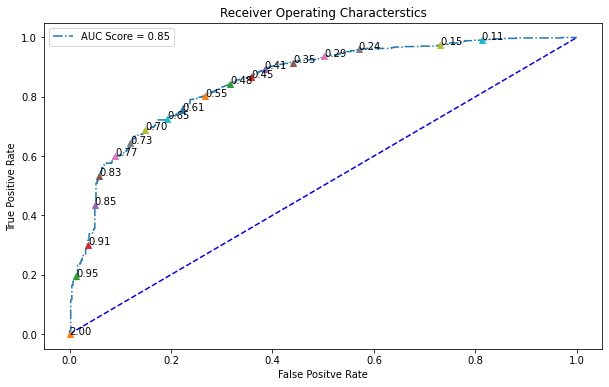

In [36]:
# roc for female
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.show()